<h1 style="
  font-size: 30px; 
  text-align: center; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px rgba(155, 104, 63, 0.84);
  letter-spacing: 2px;
">
  <b>📊 Linear Regression Model Representation</b>
</h1>
<hr style="width: 100%; border: 2px solid rgba(155, 104, 63, 0.84); border-radius: 5px;">


In [18]:
# Ready and cleaned diabetes dataset
from sklearn.datasets import load_diabetes 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = {
    'Marketing_Spend': [
        1200, 2300, 3400, 4200, 5100, 6200, 7100, 8300, 9200, 10400,
        11500, 12300, 13500, 14600, 15700, 16500, 17400, 18300, 19400, 20500,
        21400, 22500, 23600, 24500, 25400, 26500, 27600, 28500, 29600, 30500,
        31400, 32600, 33500, 34800, 35500, 36400, 37200, 38500, 39500, 40500,
        41600, 42400, 43500, 44400, 45300, 46600, 47400, 48200, 49300, 50500
    ],
    'Customer_Visits': [
        200, 230, 250, 280, 310, 340, 360, 380, 420, 440,
        470, 490, 510, 540, 570, 590, 620, 640, 670, 690,
        710, 740, 770, 790, 810, 840, 870, 890, 910, 940,
        960, 990, 1010, 1040, 1060, 1080, 1110, 1130, 1150, 1180,
        1200, 1220, 1250, 1280, 1300, 1330, 1360, 1380, 1400, 1430
    ],
    'Store_Rating': [
        2.8, 3.0, 3.1, 3.2, 3.3, 3.5, 3.6, 3.7, 3.9, 4.0,
        4.1, 4.1, 4.2, 4.3, 4.3, 4.4, 4.5, 4.5, 4.6, 4.6,
        4.7, 4.7, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 5.0, 5.0,
        5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,
        5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0
    ],
    'Monthly_Sales': [
        15000, 16500, 18000, 19800, 21200, 23000, 24600, 26000, 27800, 29500,
        31200, 32800, 34400, 36000, 37400, 39000, 40400, 41800, 43200, 44600,
        46000, 47400, 48800, 50200, 51600, 53000, 54400, 55800, 57200, 58600,
        60000, 61400, 62800, 64200, 65600, 67000, 68400, 69800, 71200, 72600,
        74000, 75400, 76800, 78200, 79600, 81000, 82400, 83800, 85200, 86600
    ]
}

df = pd.DataFrame(data)
df.head()


,Marketing_Spend,Customer_Visits,Store_Rating,Monthly_Sales
0,1200,200,2.8,15000
1,2300,230,3.0,16500
2,3400,250,3.1,18000
3,4200,280,3.2,19800
4,5100,310,3.3,21200


In [43]:
df.shape

(50, 4)

In [44]:
x = df.drop(columns = 'Monthly_Sales', axis = 1)
y = df['Monthly_Sales']

x_train, x_test, t_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px #9B6840;
">
  <b>=> Features Exploring</b>
</h3>


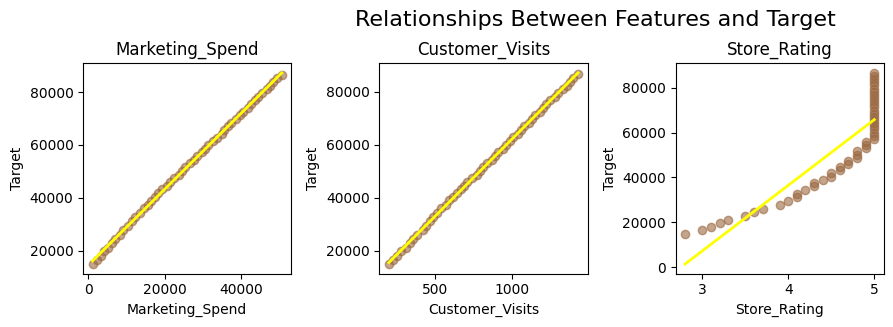

In [45]:
# set the settings for figure size
plt.figure(figsize=(12, 8)) 

# loop through each feature column and create scatter plots
for i, col in enumerate(x.columns):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns
    plt.scatter(x[col], y, color='#9B6840', alpha=0.6)
    
    # Regression line
    m, b = np.polyfit(x[col], y, 1)  # slope & intercept
    plt.plot(x[col], m * x[col] + b, color='yellow', linewidth=2)

    
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.tight_layout() # Adjust subplots to fit in figure area.

plt.suptitle("Relationships Between Features and Target", fontsize=16, y=1.02)
plt.show()

<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px #9B6840;
">
  <b>=> Model Bulding</b>
</h3>


In [46]:
# Create object of class LinearRegression
model = LinearRegression()
# Fit the model to the training data
model.fit(x_train, t_train)

LinearRegression()

In [47]:
# Make predictions on the test set
y_pred = model.predict(x_test)

<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px #9B6840;
">
  <b>=> Evaluate the model</b>
</h3>


In [48]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
print("\n📈 The Results")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"R² Score: {r2:.2f}")


📈 The Results
Mean Squared Error (MSE): 65980.91
Mean Absolute Error (MAE): 224.77
Mean Absolute Percentage Error (MAPE): 0.00
R² Score: 1.00


<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px #9B6840;
">
  <b>=> True vs Predicted Plot</b>
</h3>


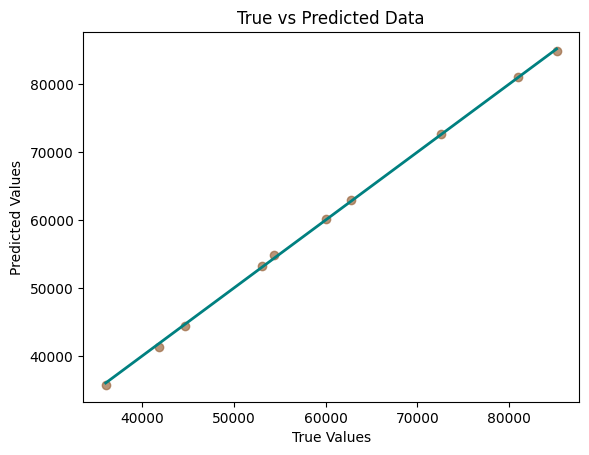

In [51]:
plt.scatter(y_test, y_pred, color='#9B6840', alpha=0.7)

# Plot the perfect reference line (y = x) for comparison
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='teal', linewidth=2) 
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Data")
plt.show()